<a href="https://colab.research.google.com/github/nPr0nn/Machine-Learning-Playground/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Auxiliary Libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [3]:
# Load the dataset
fashion_dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_dataset.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
# Associate a label with strings that represents the classes of our data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
# Pre-process our data so that each pixel in our images varies between 0 and 1
train_images = train_images / 255.0
test_images  = test_images  / 255.0

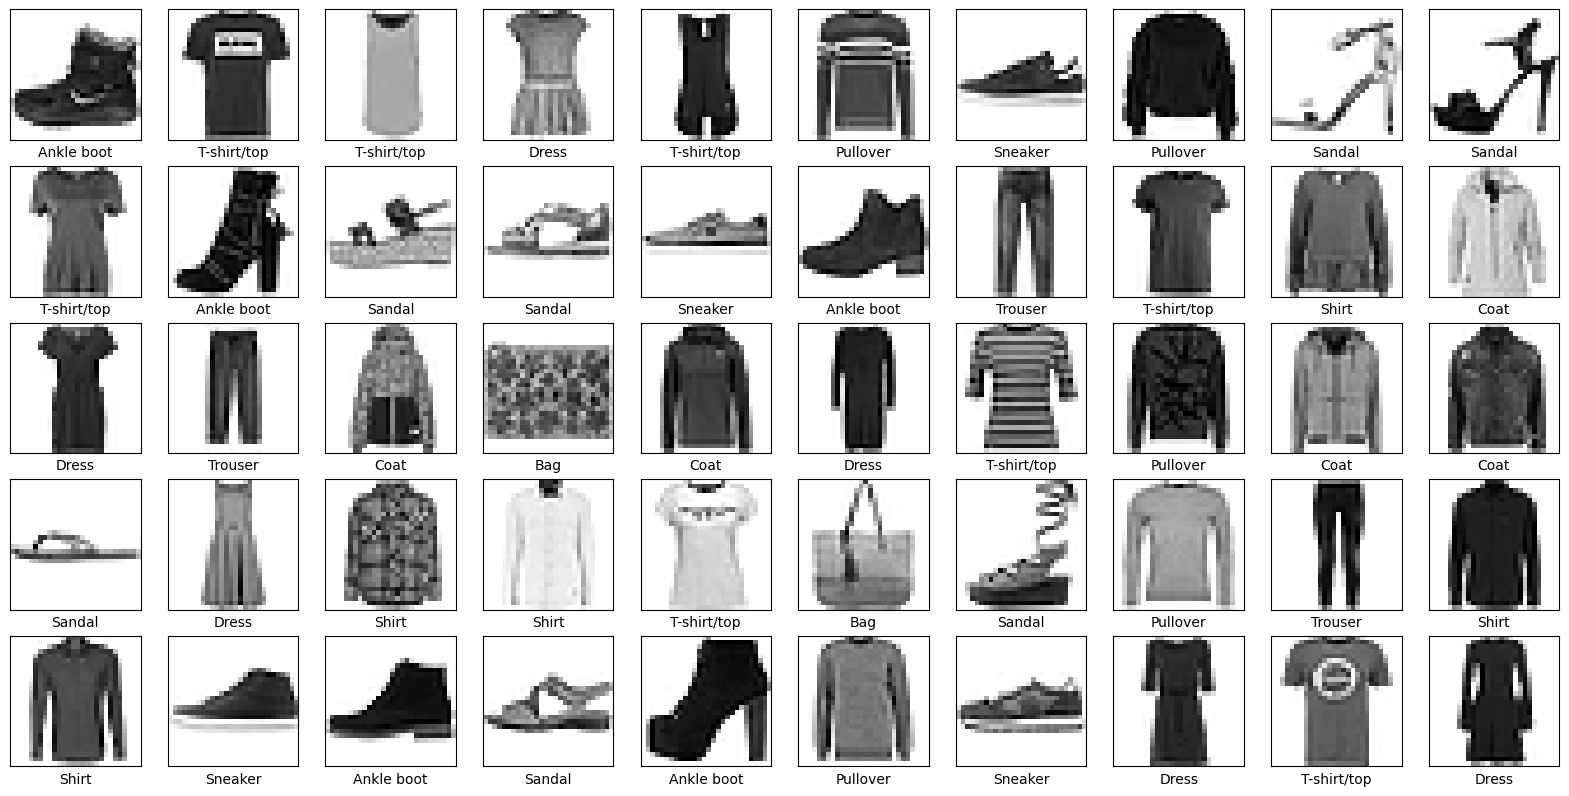


Train dataset size: 60000


In [18]:
# Plot some images from our trainning data and display their labels
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
print("\nTrain dataset size: " + str(len(train_images)))

In [19]:
test_images.shape[1]

28

In [22]:
# Create the model by constructing the layers
# Flaten - Convert image matrix into a single array of size (width x height)
# Dense ReLu - 128 neurons with activation function of Rectified Linear Unit
# Dense Softmax - 10 neurons with activation function of Softmax, returns 10 arrays of probability

img_width, img_height = test_images.shape[1], test_images.shape[2]
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(img_width, img_width)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [23]:
# Compile the model with the loss function
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1114 - accuracy: 0.6576
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6497 - accuracy: 0.7653
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5723 - accuracy: 0.7945
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5286 - accuracy: 0.8123
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4997 - accuracy: 0.8234
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4800 - accuracy: 0.8309
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4646 - accuracy: 0.8372
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4537 - accuracy: 0.8410
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4440 - accuracy: 0.8434
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.435

In [25]:
# Compare how the model performed with respect to the train and test dataset
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTrain accuracy:', train_acc)
print('\nTest accuracy:', test_acc)

1875/1875 - 3s - loss: 0.4295 - accuracy: 0.8495 - 3s/epoch - 1ms/step
313/313 - 1s - loss: 0.4648 - accuracy: 0.8338 - 625ms/epoch - 2ms/step

Train accuracy: 0.8495000004768372

Test accuracy: 0.8338000178337097


In [26]:
# Predict how the model performed with the test dataset
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [27]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)


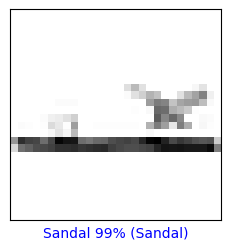

In [31]:
i = 90
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.show()